# **병렬처리와 분산처리란?**

**병렬처리(Parallel)**

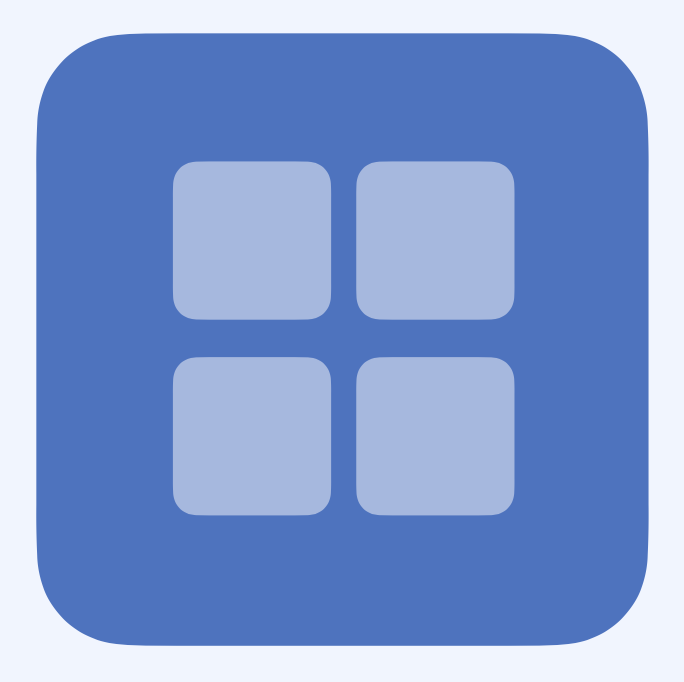

파란색을 노드라고 하고 하늘색을 데이터라고 했을 때, 이 데이터가 노드에서 처리 될 때 너무 오래 걸린다면, 데이터를 여러 개로 쪼개고 여러 쓰레드에서 각자의 테스트를 적용하여 각자 만든 결과값을 합치는 과정이다.

**분산된 환경에서의 병렬 처리**

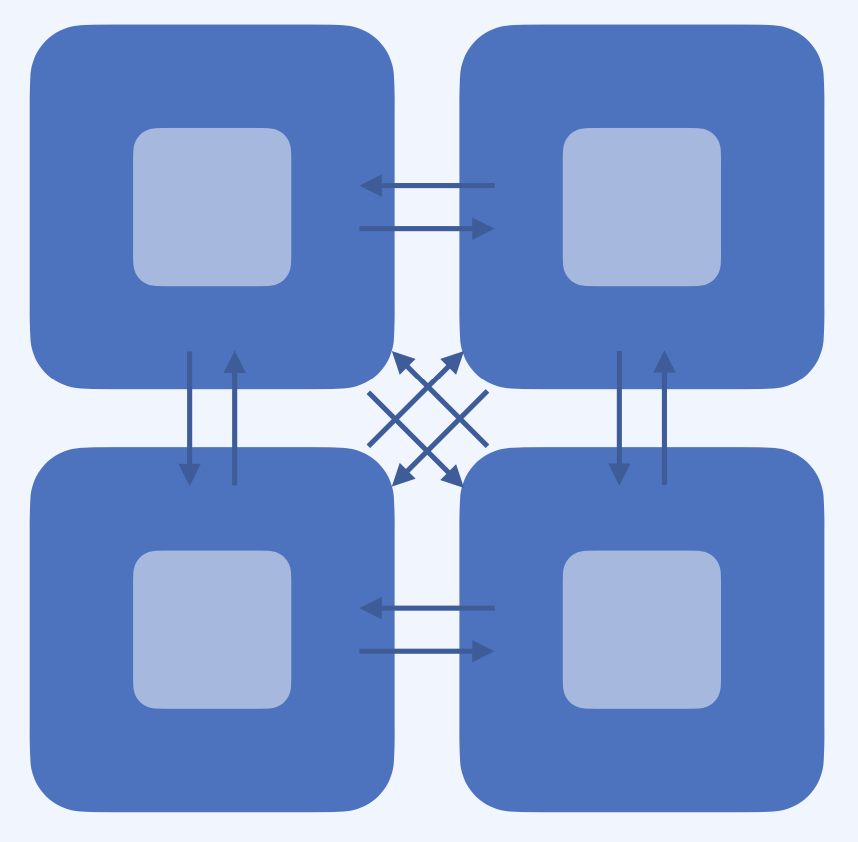

DDP(Distributed Data Parallel)

위와 비슷한데, 데이터를 여러 개로 쪼개어 여러 노드로 보낸다.

여러 노드에서 각자 독립적으로 테스크를 적용한다.

각자 만든 결과값을 합치는 과정이다.

하지만 노드 간 통신 같은 것들을 신경써야 될 것이 늘어난다
.
스파크를 이용하면 분산된 환경에서도 일반적인 병렬 처리를 하듯 코드를 짜는 것이 가능하다.

가능 이유는 스파크는 분산된 환경에서 데이터 병렬 모델을 구현해 추상화 시켜주기 때문이다.

=> RDD(Resilient Distributed Datasets) 덕분이다.

노드 간 통신 속도를 신경써서 코딩을 진행해야한다.

**분산 처리의 문제(속도, Latency)**
분산 처리로 넘어가면서 신경써야 할 문제가 많아졌다.

**부분 실패**

노드 몇 개가 프로그램과 상관 없는 이유로 인해 실패했을 때 RDD의 불변 성질을 이용해 되돌렸다가 다시 연산 할 수 있다.

모두 스파크 내부에서 일어나는 과정이기 때문에 신경쓰지 않아도 된다.

**속도**

많은 네트워크 통신을 필요로 하는 작업은 속도가 저하된다.

예를 들어 아래 코드를 보면 알 수 있다.

In [ ]:
RDD.map(A).filter(B).reduceByKey(C).take(100)
RDD.map(A).reduceByKey(B).filter(C).take(100)

두 라인 모두 비슷한 출력값이 나오는 코드이지만 속도가 완전히 다르다.

reduceByKey() 함수는 여러 노드에서의 데이터를 불러와서 하나로 합치는 작업을 한다.

두 코드는 필터와 리듀스 바이 키의 위치만 바뀐 코드 인데 다른 성능을 가졌다.

첫번째가 성능이 더 좋은데 그 이유는 리듀스 바이 키는 통신을 필요로 하는데 필터링을 거쳐 데이터 양을 줄여서 통신에 필요로 하는 양이 적어지기 때문에 속도가 빠른 코드가 된

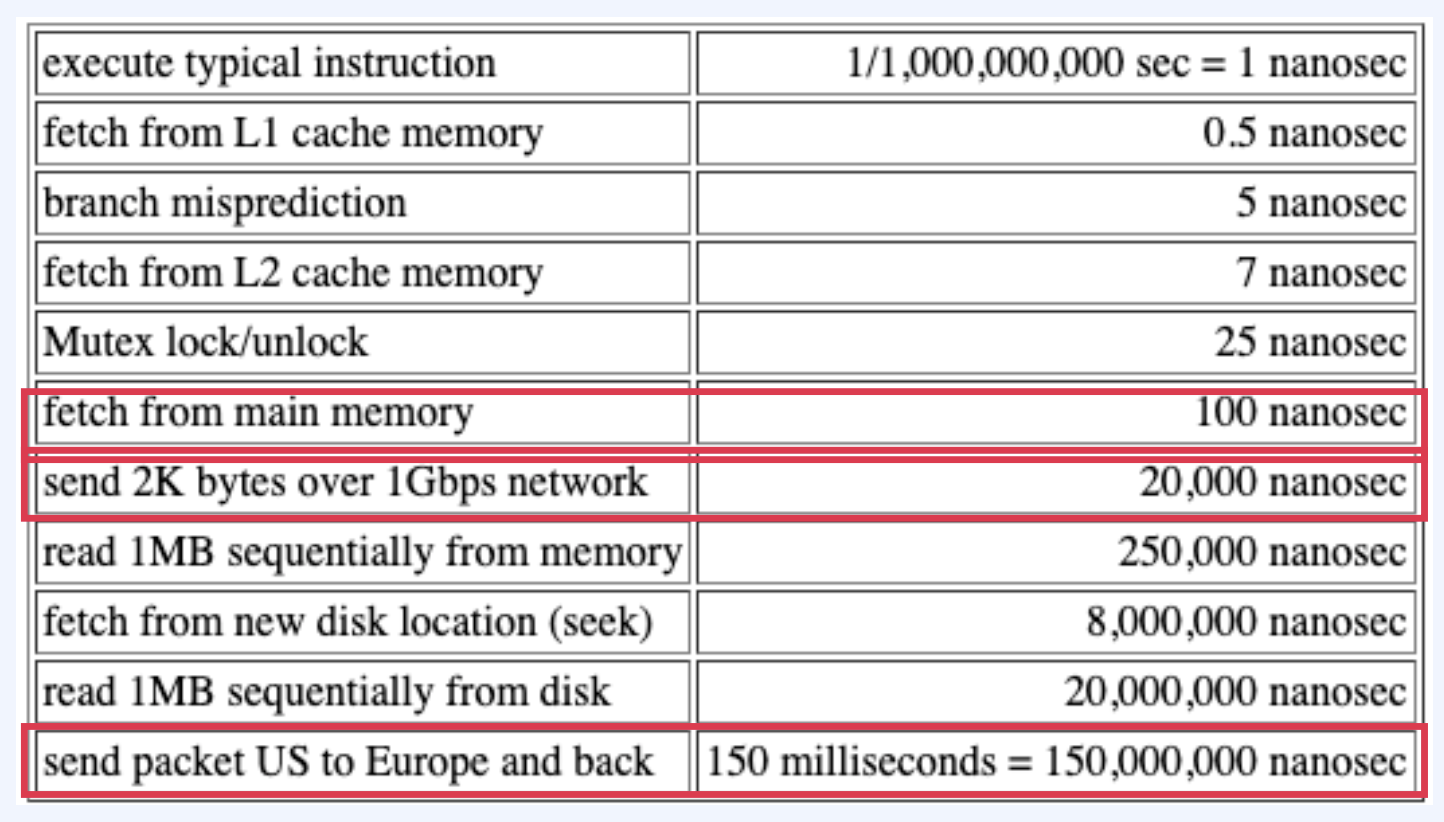

일반적으로 메모리 연산이 빠르고 그 다음이 디스크 연산 그리고 네트워크 연산이 가장 느리다.

네트워크는 메모리 연산에 비해 100만 배 정도 느리다.

스파크의 작업이 뒷단에서 어떻게 돌아갈 지 디스크를 어떻게 쓰고, 네트워크를 어떻게 쓸 지 상상하며 코딩을 하는 습관이 필요하다.